In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.sparse import hstack
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('/content/updated_preprocessed_data.csv')

In [ ]:
df.drop(columns=['reviewText', 'summary',], inplace=True)

In [ ]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
overall              0
verified             0
text                 0
additional_clean    59
sentiment            0
dtype: int64


In [ ]:
df['additional_clean'].fillna('', inplace=True)

In [ ]:
df = df[df['verified'] == True]

In [ ]:
sentiment_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
df['sentiment_encoded'] = df['sentiment'].map(sentiment_mapping)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['additional_clean'])

In [ ]:
X_sentiment = df['sentiment_encoded'].values.reshape(-1, 1)
X = hstack((tfidf_matrix, X_sentiment))

y = df['overall']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regression_model.predict(X_test)

In [ ]:
print("Predicted Values:")
for i in range(len(y_pred)):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")

Predicted Values:
Actual: 5, Predicted: 4.8357257552848445
Actual: 5, Predicted: 5.18198730626712
Actual: 2, Predicted: 1.5853362416386185
Actual: 5, Predicted: 4.923192022058829
Actual: 5, Predicted: 4.9245439769595825
Actual: 2, Predicted: 1.6753224172031151
Actual: 4, Predicted: 4.8171415625591045
Actual: 5, Predicted: 4.604469281108904
Actual: 5, Predicted: 4.641426737439737
Actual: 2, Predicted: 1.775754415641659
Actual: 4, Predicted: 4.334961443385938
Actual: 5, Predicted: 4.892981404187319
Actual: 5, Predicted: 4.5462238415390175
Actual: 5, Predicted: 4.946565871366284
Actual: 4, Predicted: 4.256831199410829
Actual: 4, Predicted: 4.45889694935445
Actual: 5, Predicted: 4.788739186925405
Actual: 5, Predicted: 4.8072934640957765
Actual: 5, Predicted: 4.794757229017506
Actual: 5, Predicted: 4.694684564397215
Actual: 5, Predicted: 4.7056740627255795
Actual: 5, Predicted: 5.009540804430924
Actual: 3, Predicted: 3.307675811623847
Actual: 5, Predicted: 4.500957480256876
Actual: 4, Predi

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")


Evaluation Metrics:
Mean Squared Error (MSE): 0.18151111842646922
Mean Absolute Error (MAE): 0.3391259274853017
Root Mean Squared Error (RMSE): 0.4260412168164827
R-squared (R2) Score: 0.8669622082857236


In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_regressor.predict(X_test)

In [ ]:
print("Predicted Values:")
for i in range(len(y_pred)):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")

Predicted Values:
Actual: 5, Predicted: 4.73
Actual: 5, Predicted: 4.67
Actual: 2, Predicted: 1.04
Actual: 5, Predicted: 4.83
Actual: 5, Predicted: 4.95
Actual: 2, Predicted: 1.8846725772955748
Actual: 4, Predicted: 4.766771645021649
Actual: 5, Predicted: 4.4586450216450215
Actual: 5, Predicted: 4.8328853108799565
Actual: 2, Predicted: 1.86
Actual: 4, Predicted: 4.52
Actual: 5, Predicted: 4.98
Actual: 5, Predicted: 4.72
Actual: 5, Predicted: 4.950352513809282
Actual: 4, Predicted: 4.18
Actual: 4, Predicted: 4.46
Actual: 5, Predicted: 4.96
Actual: 5, Predicted: 4.98
Actual: 5, Predicted: 4.87
Actual: 5, Predicted: 4.63
Actual: 5, Predicted: 4.63
Actual: 5, Predicted: 5.0
Actual: 3, Predicted: 3.0
Actual: 5, Predicted: 4.784325116031643
Actual: 4, Predicted: 4.510357232429775
Actual: 5, Predicted: 4.83
Actual: 5, Predicted: 4.958
Actual: 5, Predicted: 4.74
Actual: 5, Predicted: 4.96
Actual: 5, Predicted: 4.8328853108799565
Actual: 4, Predicted: 4.37
Actual: 5, Predicted: 4.93
Actual: 5, 

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")


Evaluation Metrics:
Mean Squared Error (MSE): 0.1426912096108466
Mean Absolute Error (MAE): 0.26640099032115266
Root Mean Squared Error (RMSE): 0.37774490017847573
R-squared (R2) Score: 0.8954150930905306


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [ ]:
residuals = y_test - y_pred

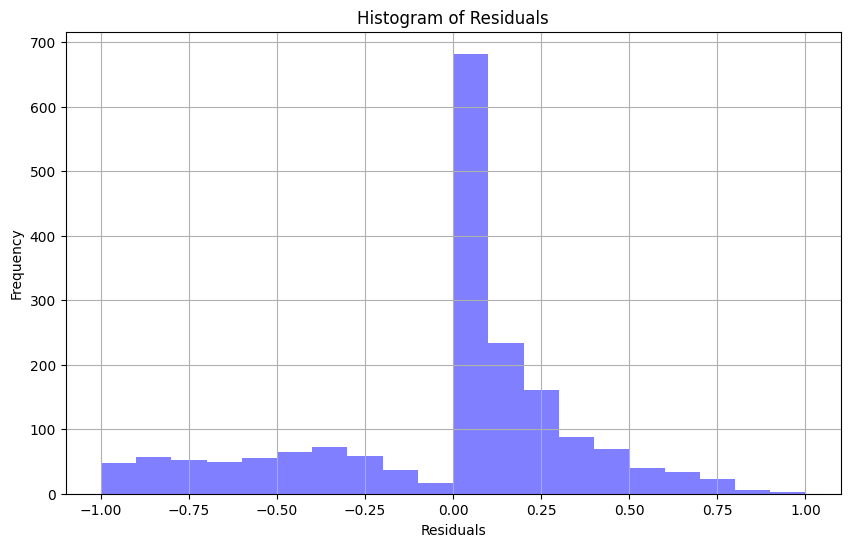

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='blue', alpha=0.5)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()